In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv')

In [3]:
df.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [36]:
a = ['Real Estate','Telecommunications','Internet','Information Technology and Services']
tmp = df[df['industry'].isin(a)]
tmp['as_of_date'] = pd.to_datetime(tmp['as_of_date'])
tmp = tmp[tmp['as_of_date']>'2016-9-9']

In [37]:
df_cat = tmp.groupby(['as_of_date','industry'])['employees_on_platform'].sum().unstack()

In [38]:
df_cat['Internet'] = savgol_filter(df_cat['Internet'], 101, 2)
df_cat['Real Estate'] = savgol_filter(df_cat['Real Estate'], 101, 2)
df_cat['Information Technology and Services'] = savgol_filter(df_cat['Information Technology and Services'], 101, 2)
df_cat['Telecommunications'] = savgol_filter(df_cat['Telecommunications'], 101, 2)

Text(0,0.5,'employees number')

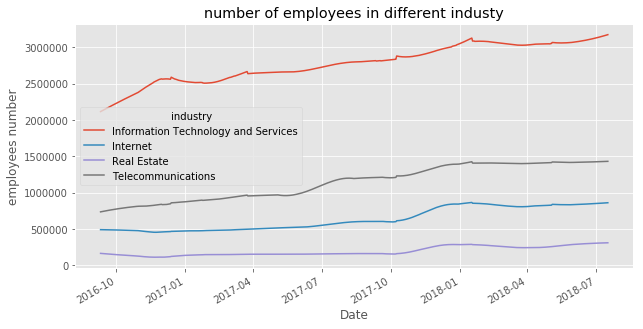

In [40]:
ax = df_cat.plot(figsize=(10,5),title = 'number of employees in different industy')
ax.set_xlabel('Date')
ax.set_ylabel('employees number')